In [160]:
#1 Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [161]:
#2 Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego,
# czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
from unicodedata import name


data=df.pivot_table(values = 'name',  index = ['race'], columns=['signs_of_mental_illness'], aggfunc = 'count')
data1 = data.rename(columns={'name':'body count'})
data1



signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [162]:
print(data1.columns.tolist())

[False, True]


In [163]:
#3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. 
# Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
#data9=data1['columns'].value_counts(normalize=True)
#data9
#data1['column'].value_counts(normalize = True)
#data1['signs_of_mental_illness, race, false, true, nic'].value_counts(normalize=True)
#.value_counts(normalize = True).mul(100).astype(str) + '%'
print('niestety żadna z powyższych z desperacji sprawdzałem nawet najgłupsze możliwości')


In [164]:
#4 Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
df['Day of Week'] = pd.to_datetime(df['date'])
df['Day of Week']= df['Day of Week'].dt.day_name()
df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [165]:
data2=df['Day of Week'].value_counts()
data2


Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: Day of Week, dtype: int64

<AxesSubplot: >

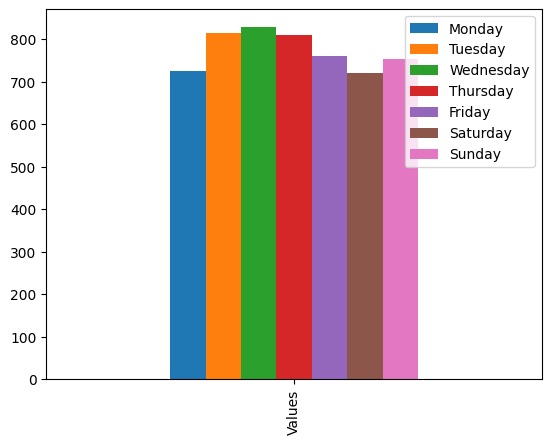

In [166]:
#4 wykres

data = pd.DataFrame({'Monday':726, 'Tuesday':816, 'Wednesday':829, 'Thursday':810, 'Friday':761, 'Saturday':721, 'Sunday':753}, index=['Values'])
data.plot(kind='bar')
#poniżej nieudane proby zrobienia tego prawidłowo



In [167]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data3 = data2.astype(cat_type)
data3.plot(kind='bar')
#niestety cały czas wyskakują błędy 

TypeError: no numeric data to plot

In [ ]:
#5 Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
# Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.


Rozumiem, że tutaj mam łączyć tylko to co jest niezbędne?
